# Classification Model of Accident Severity in NYC

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from pathlib import Path

In [4]:
# Get File Path
dir_path = Path().resolve().parent

if (dir_path / Path('data_files/clean_data')).exists():
    data_path = dir_path / Path('data_files/clean_data')
else:
    (dir_path / Path('data_files/clean_data')).mkdir(parents=True, exist_ok=True)
    data_path = dir_path / Path('data_files/clean_data')
data_path

PosixPath('/Users/rashe/git/DataScience610/data_files/clean_datas')

In [3]:
path = data_path / Path('merged_data.csv')
location_df = pd.read_csv(str(data_path / 'merged_data.csv'))
location_df.head()

,COLLISION_ID,CRASH_DATE,CRASH_TIME,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,ACCIDENT_SEVERITY,BOROUGH,PERSON_AGE,PERSON_TYPE,PERSON_SEX,BODILY_INJURY,EJECTION
0,4486555,2021-12-14,17:05:00,40.709183,-73.956825,0,0,Passing Too Closely,Unspecified,No Injury,Brooklyn,37,Occupant,Male,Unknown,Unknown
1,4486555,2021-12-14,17:05:00,40.709183,-73.956825,0,0,Passing Too Closely,Unspecified,No Injury,Brooklyn,32,Occupant,Female,Unknown,Not Ejected
2,4486519,2021-12-14,14:58:00,40.751440,-73.973970,0,0,Passing Too Closely,Unspecified,No Injury,Manhattan,37,Occupant,Unknown,Unknown,Unknown
3,4486519,2021-12-14,14:58:00,40.751440,-73.973970,0,0,Passing Too Closely,Unspecified,No Injury,Manhattan,37,Occupant,Male,Unknown,Not Ejected
4,4486519,2021-12-14,14:58:00,40.751440,-73.973970,0,0,Passing Too Closely,Unspecified,No Injury,Manhattan,22,Occupant,Male,Unknown,Not Ejected


In [4]:
location_df.shape

(3480384, 16)

In [5]:
location_df.columns

Index(['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'LATITUDE', 'LONGITUDE',
       'NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED',
       'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2',
       'ACCIDENT_SEVERITY', 'BOROUGH', 'PERSON_AGE', 'PERSON_TYPE',
       'PERSON_SEX', 'BODILY_INJURY', 'EJECTION'],
      dtype='object')

## Downsize Model to about 50000 rows per Borough. If Model Performance is bad we will use SMOTE

In [6]:
location_model_df = location_df.groupby('BOROUGH', group_keys=False).apply(lambda x: x.sample(n=min(50000, len(x)), random_state=42)).reset_index(drop=True)
location_model_df['BOROUGH'].value_counts()

/var/folders/k0/7nbjk7js45l8wk701f59my980000gn/T/ipykernel_24072/2516506423.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  location_model_df = location_df.groupby('BOROUGH', group_keys=False).apply(lambda x: x.sample(n=min(50000, len(x)), random_state=42)).reset_index(drop=True)


BOROUGH
Bronx            50000
Brooklyn         50000
Manhattan        50000
Queens           50000
Staten Island    50000
Name: count, dtype: int64

In [7]:
location_df.columns

Index(['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'LATITUDE', 'LONGITUDE',
       'NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED',
       'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2',
       'ACCIDENT_SEVERITY', 'BOROUGH', 'PERSON_AGE', 'PERSON_TYPE',
       'PERSON_SEX', 'BODILY_INJURY', 'EJECTION'],
      dtype='object')

In [8]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
columns = location_model_df[['CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2', 'BOROUGH', 'PERSON_TYPE', 'PERSON_SEX', 'BODILY_INJURY', 'EJECTION']].columns.tolist()
label_encoder_severity = LabelEncoder()
location_model_df['ACCIDENT_SEVERITY_ENCODED'] = label_encoder_severity.fit_transform((location_model_df['ACCIDENT_SEVERITY']))
for x in columns:
    title = x + '_ENCODED'
    location_model_df[title] = LabelEncoder().fit_transform((location_model_df[x]))
location_model_df.head(10)

,COLLISION_ID,CRASH_DATE,CRASH_TIME,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,ACCIDENT_SEVERITY,...,BODILY_INJURY,EJECTION,ACCIDENT_SEVERITY_ENCODED,CONTRIBUTING_FACTOR_VEHICLE_1_ENCODED,CONTRIBUTING_FACTOR_VEHICLE_2_ENCODED,BOROUGH_ENCODED,PERSON_TYPE_ENCODED,PERSON_SEX_ENCODED,BODILY_INJURY_ENCODED,EJECTION_ENCODED
0,4464932,2021-10-07,07:58:00,40.830944,-73.897660,0,0,Passing Too Closely,Unspecified,No Injury,...,Unknown,Not Ejected,3,31,51,0,1,0,12,1
1,3942923,2018-07-16,10:52:00,40.875458,-73.854850,0,0,Driver Inattention/Distraction,Unspecified,No Injury,...,Unknown,Unknown,3,8,51,0,1,1,12,4
2,3684508,2017-05-31,17:41:00,40.837210,-73.879715,0,0,Failure to Yield Right-of-Way,Unspecified,No Injury,...,Unknown,Unknown,3,14,51,0,1,0,12,4
3,3295713,2015-09-11,10:15:00,40.871005,-73.893839,1,0,View Obstructed/Limited,Unspecified,Minor Injury,...,Unknown,Unknown,2,53,51,0,1,2,12,4
4,4409390,2021-04-20,18:25:00,40.803210,-73.918920,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Minor Injury,...,Unknown,Not Ejected,2,8,8,0,1,0,12,1
5,3913779,2018-06-03,17:27:00,40.845210,-73.908450,0,0,Other Vehicular,Alcohol Involvement,No Injury,...,Unknown,Unknown,3,27,2,0,1,1,12,4
6,4430769,2021-06-24,11:11:00,40.825424,-73.923485,1,0,Unsafe Speed,Backing Unsafely,Minor Injury,...,Knee-Lower Leg Foot,Not Ejected,2,50,4,0,0,1,9,1
7,3569702,2016-11-24,22:53:00,40.831180,-73.838130,0,0,Following Too Closely,Unspecified,No Injury,...,Unknown,Not Ejected,3,17,51,0,1,0,12,1
8,4342686,2020-08-29,00:50:00,40.843548,-73.870310,1,0,Other Vehicular,Driver Inattention/Distraction,Minor Injury,...,Knee-Lower Leg Foot,Not Ejected,2,27,8,0,0,1,9,1
9,4172970,2019-07-18,00:00:00,40.814360,-73.913260,0,0,Driver Inattention/Distraction,Other Vehicular,No Injury,...,Unknown,Unknown,3,8,27,0,1,1,12,4


In [9]:
def seasons(row):
    month = row['MONTH']
    match month:
        case month if month <= 3 : 
            return 1
        case month if month <= 6:
            return 2
        case month if month <= 9:
            return 3
        case month if month <= 12:
            return 4
    

In [10]:
location_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   COLLISION_ID                           250000 non-null  int64  
 1   CRASH_DATE                             250000 non-null  object 
 2   CRASH_TIME                             250000 non-null  object 
 3   LATITUDE                               250000 non-null  float64
 4   LONGITUDE                              250000 non-null  float64
 5   NUMBER_OF_PERSONS_INJURED              250000 non-null  int64  
 6   NUMBER_OF_PERSONS_KILLED               250000 non-null  int64  
 7   CONTRIBUTING_FACTOR_VEHICLE_1          250000 non-null  object 
 8   CONTRIBUTING_FACTOR_VEHICLE_2          250000 non-null  object 
 9   ACCIDENT_SEVERITY                      250000 non-null  object 
 10  BOROUGH                                250000 non-null  

In [11]:
# Extract year, month, day of the week, and whether it was a weekend
location_model_df['CRASH_DATE'] = pd.to_datetime(location_model_df['CRASH_DATE'])
location_model_df['CRASH_TIME'] = pd.to_datetime(location_model_df['CRASH_TIME'], format='%H:%M:%S').dt.time

location_model_df['YEAR'] = location_model_df['CRASH_DATE'].dt.year
location_model_df['MONTH'] = location_model_df['CRASH_DATE'].dt.month
location_model_df['DAY_OF_WEEK'] = location_model_df['CRASH_DATE'].dt.weekday  # Monday=0, Sunday=6
location_model_df['IS_WEEKEND'] = location_model_df['DAY_OF_WEEK'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

location_model_df['SEASON'] = location_model_df.apply(seasons, axis=1)

In [12]:
location_model_df.head()

,COLLISION_ID,CRASH_DATE,CRASH_TIME,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,ACCIDENT_SEVERITY,...,BOROUGH_ENCODED,PERSON_TYPE_ENCODED,PERSON_SEX_ENCODED,BODILY_INJURY_ENCODED,EJECTION_ENCODED,YEAR,MONTH,DAY_OF_WEEK,IS_WEEKEND,SEASON
0,4464932,2021-10-07,07:58:00,40.830944,-73.897660,0,0,Passing Too Closely,Unspecified,No Injury,...,0,1,0,12,1,2021,10,3,0,4
1,3942923,2018-07-16,10:52:00,40.875458,-73.854850,0,0,Driver Inattention/Distraction,Unspecified,No Injury,...,0,1,1,12,4,2018,7,0,0,3
2,3684508,2017-05-31,17:41:00,40.837210,-73.879715,0,0,Failure to Yield Right-of-Way,Unspecified,No Injury,...,0,1,0,12,4,2017,5,2,0,2
3,3295713,2015-09-11,10:15:00,40.871005,-73.893839,1,0,View Obstructed/Limited,Unspecified,Minor Injury,...,0,1,2,12,4,2015,9,4,0,3
4,4409390,2021-04-20,18:25:00,40.803210,-73.918920,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Minor Injury,...,0,1,0,12,1,2021,4,1,0,2


## Model for Predicting an Accident's Severity and Borough Given Coordinates and Contributing Factors

In [13]:
location_model_df.columns

Index(['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'LATITUDE', 'LONGITUDE',
       'NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED',
       'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2',
       'ACCIDENT_SEVERITY', 'BOROUGH', 'PERSON_AGE', 'PERSON_TYPE',
       'PERSON_SEX', 'BODILY_INJURY', 'EJECTION', 'ACCIDENT_SEVERITY_ENCODED',
       'CONTRIBUTING_FACTOR_VEHICLE_1_ENCODED',
       'CONTRIBUTING_FACTOR_VEHICLE_2_ENCODED', 'BOROUGH_ENCODED',
       'PERSON_TYPE_ENCODED', 'PERSON_SEX_ENCODED', 'BODILY_INJURY_ENCODED',
       'EJECTION_ENCODED', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'IS_WEEKEND',
       'SEASON'],
      dtype='object')

In [14]:
# Split the data
x = location_model_df[['CONTRIBUTING_FACTOR_VEHICLE_1_ENCODED',
       'CONTRIBUTING_FACTOR_VEHICLE_2_ENCODED', 'BOROUGH_ENCODED', 'PERSON_TYPE_ENCODED', 'PERSON_SEX_ENCODED', 'BODILY_INJURY_ENCODED', 'EJECTION_ENCODED', 'PERSON_AGE', 'IS_WEEKEND', 'SEASON']]
y = location_model_df['ACCIDENT_SEVERITY_ENCODED']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
# Predict the type of severity of accident
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [16]:
# Decode the predictions back to the original accident severity
y_pred_decoded = label_encoder_severity.inverse_transform(y_pred)

# Decode the true labels (y_test) as well
y_test_decoded = label_encoder_severity.inverse_transform(y_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

def get_metrics(y_true, y_pred, title: str, labels):
    
    print("Accuracy Score:")
    print(accuracy_score(y_true, y_pred))
    
    print("\nPrecision Score:")
    print(precision_score(y_true, y_pred, average='macro'))
    
    print("\nRecall Score:")
    print(recall_score(y_true, y_pred, average='macro'))
    
    print("\nf1 Score:")
    print(f1_score(y_true, y_pred, average='macro'))
    
    print("\nClassification Report: ")
    print(classification_report(y_true, y_pred))
    
    #  Confusion Matrix
    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', cmap='Blues', 
                xticklabels=labels, 
                yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(dir_path / f'Visualizations/{title}_Confusion_Matrix.png')
    plt.show()

Accuracy Score:
0.7521466666666666

Precision Score:
0.4160678536257183

Recall Score:
0.3528932255105098

f1 Score:
0.3692281286941096

Classification Report: 
              precision    recall  f1-score   support

       Fatal       0.04      0.01      0.01       110
Major Injury       0.30      0.13      0.18      3243
Minor Injury       0.52      0.36      0.42     17149
   No Injury       0.81      0.92      0.86     54498

    accuracy                           0.75     75000
   macro avg       0.42      0.35      0.37     75000
weighted avg       0.72      0.75      0.73     75000


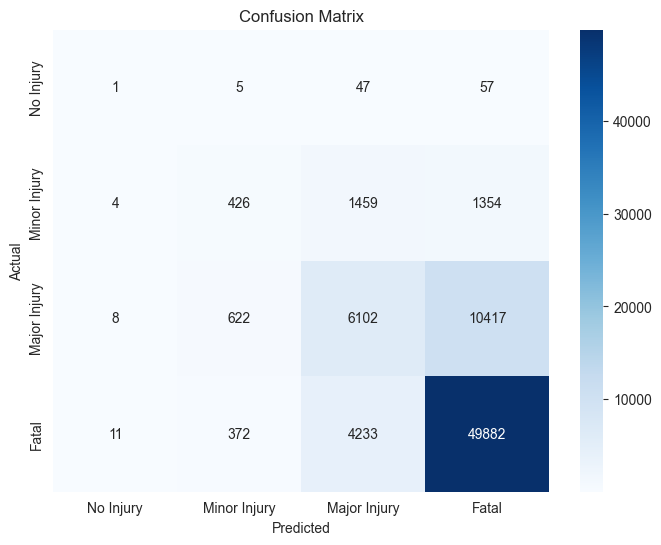

In [18]:
accident_severity = location_df.ACCIDENT_SEVERITY.unique().tolist()
get_metrics(y_test_decoded, y_pred_decoded, "severity_random_forest", accident_severity)

In [19]:
# Using SMOTE 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())  # Check class distribution before SMOTE
print("After SMOTE:", y_train_resampled.value_counts())  # Check class distribution after SMOTE

# Train a RandomForestClassifier on the resampled data
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(x_train_resampled, y_train_resampled)

y_pred = clf.predict(x_test)

# Decode the predictions back to the original accident severity
y_pred_decoded = label_encoder_severity.inverse_transform(y_pred)

# Decode the true labels (y_test) as well
y_test_decoded = label_encoder_severity.inverse_transform(y_test)

Before SMOTE: ACCIDENT_SEVERITY_ENCODED
3    127090
2     39984
1      7691
0       235
Name: count, dtype: int64
After SMOTE: ACCIDENT_SEVERITY_ENCODED
1    127090
3    127090
2    127090
0    127090
Name: count, dtype: int64


Accuracy Score:
0.6915866666666667

Precision Score:
0.42975235301553305

Recall Score:
0.4790970399379004

f1 Score:
0.31535950370974764

Classification Report: 
              precision    recall  f1-score   support

       Fatal       0.01      0.60      0.02       110
Major Injury       0.27      0.36      0.30      3243
Minor Injury       0.64      0.05      0.08     17149
   No Injury       0.80      0.92      0.85     54498

    accuracy                           0.69     75000
   macro avg       0.43      0.48      0.32     75000
weighted avg       0.74      0.69      0.65     75000


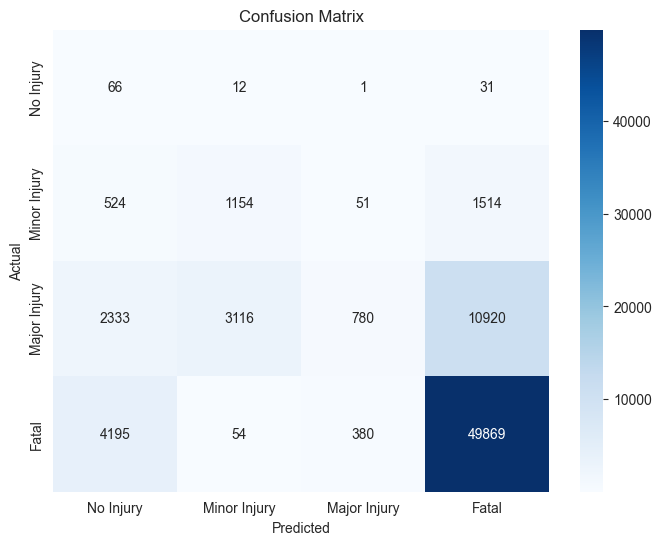

In [20]:
get_metrics(y_test_decoded, y_pred_decoded, "severity_random_forest_smote", accident_severity)

# Lets try using another model in Logistic Regression

/Users/rashe/git/DataScience610/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:
0.54328

Precision Score:
0.3235882149547803

Recall Score:
0.4351018608326845

f1 Score:
0.2897153985442934

Classification Report: 
              precision    recall  f1-score   support

       Fatal       0.00      0.64      0.01       110
Major Injury       0.15      0.26      0.19      3243
Minor Injury       0.34      0.17      0.23     17149
   No Injury       0.80      0.68      0.73     54498

    accuracy                           0.54     75000
   macro avg       0.32      0.44      0.29     75000
weighted avg       0.66      0.54      0.59     75000


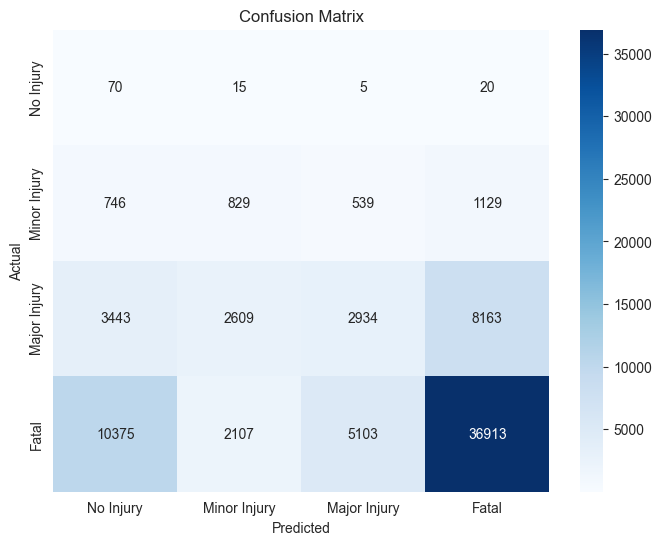

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
log_reg.fit(x_train_resampled, y_train_resampled)

# Predict on test data
y_pred_log_reg = log_reg.predict(x_test)

# Decode the predictions back to the original accident severity
y_pred_decoded = label_encoder_severity.inverse_transform(y_pred_log_reg)

# Evaluate the model
get_metrics(y_test_decoded, y_pred_decoded, "severity_regression", accident_severity)

In [22]:
location_model_df.to_csv(str(dir_path / Path('data_files/clean_data/location_model_data.csv')), index=False)